<a href="https://colab.research.google.com/github/BellaDir/Astro-Data/blob/main/TransitFittingCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # Imports Python number library
import matplotlib.pyplot as plt # Imports Python plotting library
import astropy.units as u # Imports Python astronomy unit library
import astropy.constants as c # Imports Python astronomy constant library

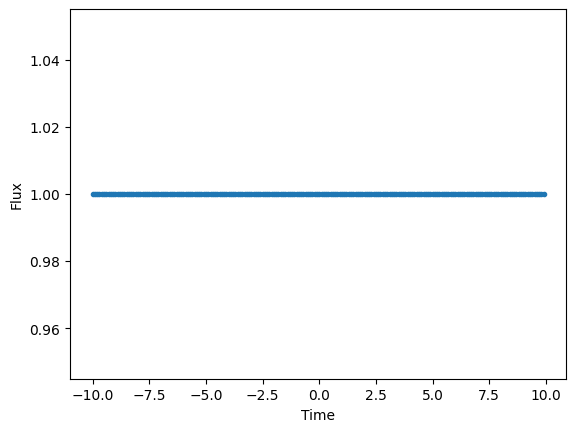

In [3]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # Creates a time array from -10 to 10 hours with a step size of 0.1 hours
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # Creates a flux array with the same shape as the time array
plt.plot(time_arr, flux_arr, linestyle="--", marker=".") # Plots flux versus time with a dashed line and dot markers
plt.xlabel("Time") # Label's the x-axis "Time"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.show() # Display's the plot

In [4]:
tau = 2.0 * u.hour # Defines tau (duration) as 2 hours
t_0 = 1.0 * u.hour # Defines t0 (reference time) as 1 hour
time_start = t_0 - tau / 2 # Defines the start time in terms of t0 and tau
time_end = t_0 + tau / 2 # Defines the end time in terms of t0 and tau
print(time_start, time_end) # Prints the calculated start and end time

0.0 h 2.0 h


In [5]:
for i in range(len(time_arr)): # Creates a for loop over each index in the time array
    if i < 10: # Checks for indices less than 10
      print("index =", i, "value = ", time_arr[i]) # If the index is less than 10, print the index and the corresponding time value

index = 0 value =  -10.0 h
index = 1 value =  -9.9 h
index = 2 value =  -9.8 h
index = 3 value =  -9.700000000000001 h
index = 4 value =  -9.600000000000001 h
index = 5 value =  -9.500000000000002 h
index = 6 value =  -9.400000000000002 h
index = 7 value =  -9.300000000000002 h
index = 8 value =  -9.200000000000003 h
index = 9 value =  -9.100000000000003 h


In [6]:
ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # Finds the indices in the time array where the time values are between the previously defined start and end time
print(time_arr[ind]) # Prints the values from the time array that correspond to the defined indices

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ] h


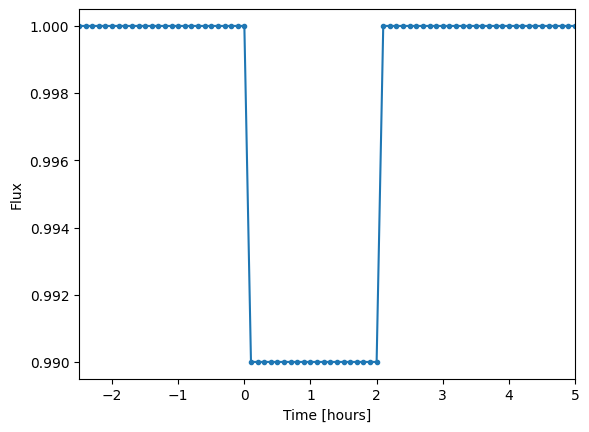

In [7]:
delta = 0.01 # Defines delta as 0.01
flux_arr[ind] = 1.0 - delta # Defines the values of the flux array at the indices, in terms of delta
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") # Plots flux versus time with a solid line and dot markers
plt.xlabel("Time [hours]") # Label's the x-axis "Time"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.xlim(-2.5, 5.0) # Creates a limit on the x-axis
plt.show() # Display's the plot

In [8]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta): # Defines the function to generate a transit lightcurve
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # Defines a flux array with the same shape as time_arr
  time_start = t_0 - tau / 2 # Calculates the start time of the transit
  time_end = t_0 + tau / 2 # Calculates the end time of the transit
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end)) # Finds the indices of the time array where the time is between the previously defined start and end time
  flux_arr[ind] = 1.0 - delta # Sets the flux values at the transit indices to be in terms of delta
  return flux_arr # Returns the flux array representing the transit event

In [9]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # Creates a time array from -10 to 10 hours with a step size of 0.1 hours
tau = 4.0 * u.hour # Defines tau (duration) as 4 hours
t_0 = 2.0 * u.hour # Defines t0 (reference time) as 2 hours
delta = 0.99 # Defines delta as 0.99
flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta) # Calls the function to generate the transit lightcurve

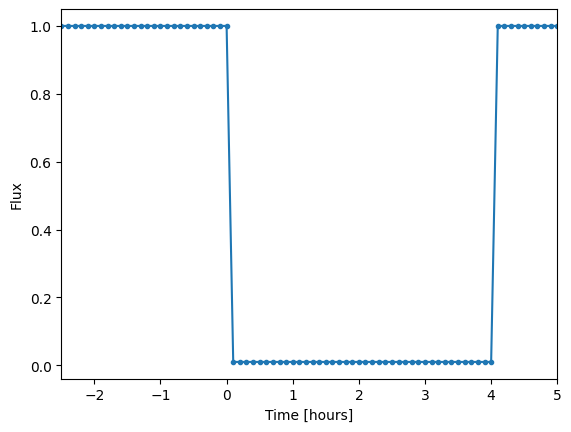

In [10]:
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") # Plots flux versus time with a solid line and dot markers
plt.xlabel("Time [hours]") # Label's the x-axis "Time"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.xlim(-2.5, 5.0) # Creates a limit on the x-axis
plt.show() # Display's the plot

In [1]:
from google.colab import files # Imports the Colab file upload library
uploaded = files.upload() # Uploads files to Colab

Saving gj436b.tbl to gj436b.tbl


In [11]:
import astropy.io.ascii # Imports the Astropy library for reading files
dat = astropy.io.ascii.read("gj436b.tbl") # Reads the given data file

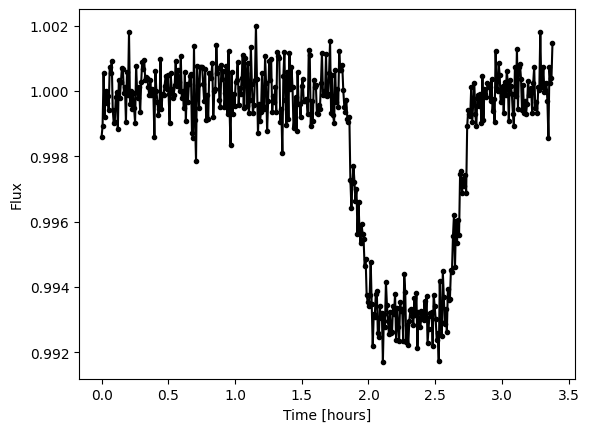

In [12]:
time_obs = dat["HJD"] # Extracts the "HJD" column from the data
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # Converts the time to hours
flux_obs = dat["Relative_Flux"] # Extracts the "Relative_Flux" column from the data
plt.plot(time_obs, flux_obs, marker=".", color="black") # Plots the observed flux versus time with black dots
plt.xlabel("Time [hours]") # Label's the x-axis "Time"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.show() # Display's the plot

In [13]:
t_0 = 2.2 * u.hour # Defines t0 (reference time) as 2.2 hours
tau = 1.0 * u.hour # Defines tau (duration) as 1 hour
delta = 0.008 # Defines delta as 0.008
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # Generates the model flux using the previously defined parameters

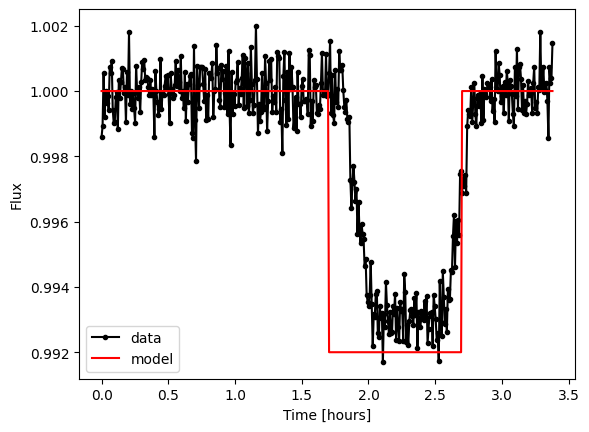

In [14]:
time_obs = dat["HJD"] # Extracts the "HJD" column from the data
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour # Converts the time to hours
flux_obs = dat["Relative_Flux"] # Extracts the "Relative_Flux" column from the data
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # Plots the observed flux versus time with black dots and labels it "data"
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # Plots the model flux versus time with a red solid line and labels it "model"
plt.xlabel("Time [hours]") # Label's the x-axis "Time"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.legend() # Displays a legend
plt.show() # Display's the plot

In [16]:
ind = np.where(time_obs < 1.5 * u.hour)  # Define the region outside of the transit
error = np.std(flux_obs[ind])  # Calculate the standard deviation as the error

In [18]:
degree_of_freedom = len(time_obs) - 3  # 3 free parameters, t_0, tau, and delta
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom # Compute reduced Chi^2
print(reduced_Chi2) # Print the reduced Chi^2 value

9.328644213403495


In [19]:
t_0 = 2.3 * u.hour # Defines t0 (reference time) as 2.3 hours
tau = 0.8 * u.hour # Defines tau (duration) as 0.8 hours
delta = 0.007 # Defines delta as 0.007
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # Generates the model flux using the previously defined parameters

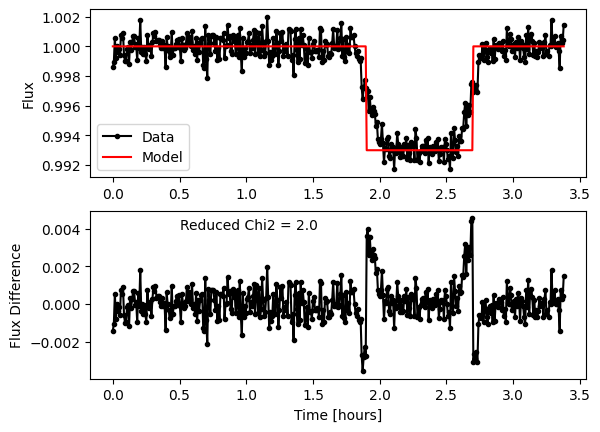

In [22]:
plt.subplot(2, 1, 1) # Create a subplot for the flux data and model
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # Plots the observed flux versus time with black dots and labels it "data"
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # Plots the model flux versus time with a red solid line and labels it "model"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.legend() # Displays a legend

plt.subplot(2, 1, 2) # Create a subplot for the flux difference
plt.plot(time_obs, flux_obs - flux_model, marker=".", color="black") # Plot residuals
plt.xlabel("Time [hours]") # Label's the x-axis "Time"
plt.ylabel("Flux Difference") # Label's the y-axis "Flux Difference"

degree_of_freedom = len(time_obs) - 3 # 3 free parameters, t_0, tau, and delta
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom # Compute reduced Chi^2
plt.annotate(f"Reduced Chi2 = {reduced_Chi2:.1f}", xy=(0.5, 0.004), fontsize=10) # Add annotation for Chi^2 on the plot
plt.show() # Display's the plot

Trying Different Parameters

In [23]:
t_0 = 2.5 * u.hour # Defines t0 (reference time) as 2.5 hours
tau = 1.2 * u.hour # Defines tau (duration) as 1.2 hours
delta = 0.005 # Defines delta as 0.008
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta) # Generates the model flux using the previously defined parameters

In [24]:
degree_of_freedom = len(time_obs) - 3 # 3 free parameters, t_0, tau, and delta
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom # Compute reduced Chi^2
print(reduced_Chi2) # Print the reduced Chi^2 value

7.365194426214554


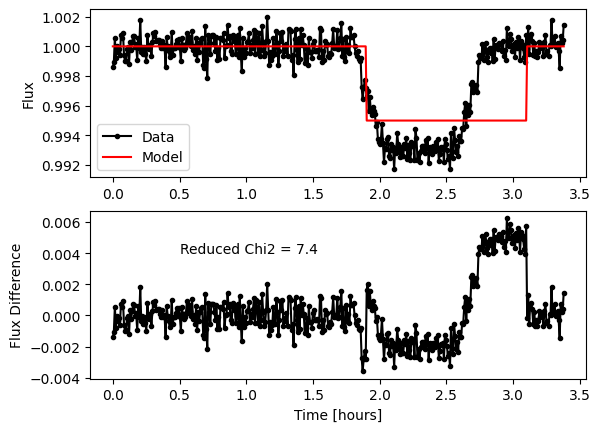

In [25]:
plt.subplot(2, 1, 1) # Create a subplot for the flux data and model
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data") # Plots the observed flux versus time with black dots and labels it "data"
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model") # Plots the model flux versus time with a red solid line and labels it "model"
plt.ylabel("Flux") # Label's the y-axis "Flux"
plt.legend() # Displays a legend

plt.subplot(2, 1, 2) # Create a subplot for the flux difference
plt.plot(time_obs, flux_obs - flux_model, marker=".", color="black") # Plot residuals
plt.xlabel("Time [hours]") # Label's the x-axis "Time"
plt.ylabel("Flux Difference") # Label's the y-axis "Flux Difference"

degree_of_freedom = len(time_obs) - 3 # 3 free parameters, t_0, tau, and delta
reduced_Chi2 = np.sum(((flux_obs - flux_model) / error)**2) / degree_of_freedom # Compute reduced Chi^2
plt.annotate(f"Reduced Chi2 = {reduced_Chi2:.1f}", xy=(0.5, 0.004), fontsize=10) # Add annotation for Chi^2 on the plot
plt.show() # Display's the plot